In [1]:
"""Importing Important libraries"""
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import json
import os 
import sklearn

In [2]:
# Read Data 
data = pd.read_csv('dataset.csv')
data.head(3)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
0,100.64.0.2-100.64.0.1-0-0-0,100.64.0.2,0,100.64.0.1,0,0,2023-03-19 15:02:20.266440,117265975,24,24,...,150.478261,21.023514,188.0,104.0,5.098364e+06,9600.548411,5102694.0,5058427.0,0,0
1,10.16.0.6-144.122.71.18-34788-6443-6,10.16.0.6,34788,144.122.71.18,6443,6,2023-03-19 15:02:22.387673,116365340,347,399,...,252225.789474,37764.416542,330282.0,182906.0,5.858473e+06,27027.010586,5900021.0,5780088.0,116365340,0
2,10.16.0.6-144.122.71.18-0-0-0,10.16.0.6,0,144.122.71.18,0,0,2023-03-19 15:02:22.901650,116311908,60,60,...,200688.000000,115.236954,201019.0,200516.0,5.910436e+06,35670.903124,5985028.0,5829637.0,0,0


### Data Inspection

In [3]:
data.shape

(3231475, 87)

> The dataset consists of 3.2 million instances and 87 features with 1 target column 

In [4]:
data.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd RST Flags',
       'Bwd RST Flags', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min',
       'Packet Length Max', 'Packet Length Mean'

> The features include mostly information about network packets, network protocols, time durations, lengths and other similar information

> The target variable is named 'Label' showing 11 different labels, conveying this is a task of multi-class classification 

> the information on each label is given below

- Benign	0
- CVE‑2020‑13379	1
- Node-RED Reconnaissance	2
- Node-RED RCE	3
- Node-RED Container Escape	4
- CVE‑2021‑43798	5
- CVE‑2019‑20933	6
- CVE‑2021‑30465	7
- CVE‑2021‑25741	8
- CVE‑2022‑23648	9
- CVE‑2019‑5736	10
- DSB Nuclei Scan	11

### DATA DESCRIBE

In [5]:
data.iloc[:, :15].describe() # 11 numerical columns 

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean
count,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06
mean,3.795397e+04,7.856463e+03,6.202331e+00,6.954488e+06,1.287863e+02,1.057871e+02,6.424691e+04,1.849348e+05,1.539499e+03,9.127386e-01,1.893546e+02
std,1.731281e+04,4.032255e+03,1.558721e+00,2.454306e+07,6.822713e+02,5.863471e+02,6.231018e+05,1.269267e+06,3.683048e+03,9.554780e+00,3.597574e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.592100e+04,8.080000e+03,6.000000e+00,7.507000e+03,5.000000e+00,5.000000e+00,4.430000e+02,3.570000e+02,2.680000e+02,0.000000e+00,5.833333e+01
50%,4.098100e+04,8.080000e+03,6.000000e+00,3.760600e+04,6.000000e+00,5.000000e+00,5.200000e+02,3.570000e+02,5.180000e+02,0.000000e+00,8.750000e+01
75%,5.201400e+04,8.080000e+03,6.000000e+00,1.297550e+05,7.000000e+00,6.000000e+00,1.040000e+03,3.570000e+02,5.340000e+02,0.000000e+00,1.472857e+02
max,6.553500e+04,6.538700e+04,1.700000e+01,1.200000e+08,1.462100e+04,1.796600e+04,1.892794e+07,4.819421e+07,6.470400e+04,5.083000e+03,1.715153e+04


> Src Port and Dst Port Values are mostly 4 and 3 digit numbers 

> Three Protocols: HOPOPT (0), TCP (6) and UDP (17)

> There are 3 types of Protocol: 0, 6 and 17 with TCP being the highest used protocol (31 lac instances), 0 being the lowest (7k instances)

> Flow Duration is linearly increasing

In [40]:
import time
from scipy import stats

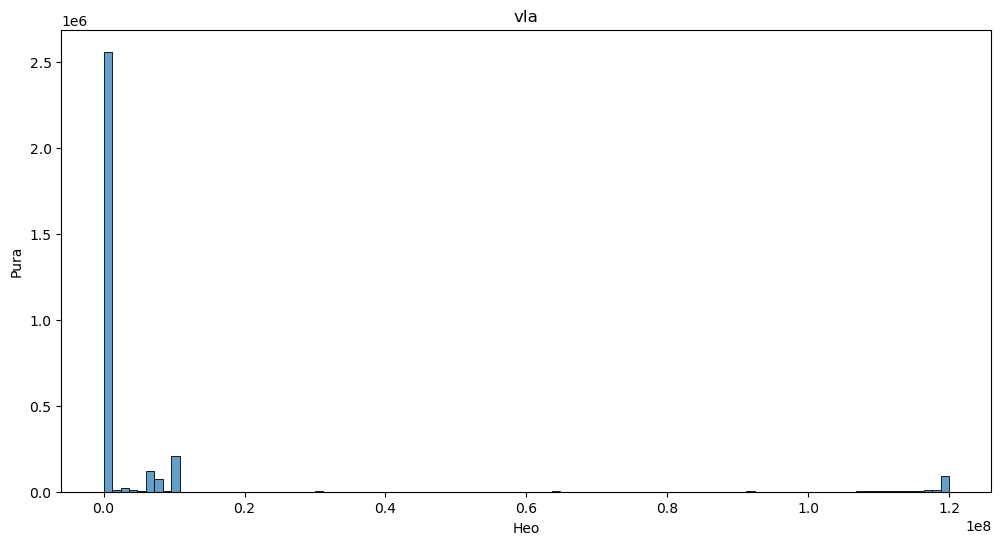

In [55]:
# Histogram 
plt.figure(figsize=(12, 6))
sns.histplot(data['Flow Duration'], bins=100, edgecolor='black', alpha=0.7)
plt.title('vla')
plt.xlabel('Heo')
plt.ylabel('Pura')
plt.show()

In [50]:
shapiro_test = stats.shapiro(df['Flow Duration'][:3000])
print("Shapiro-Wilk Test:")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# Kolmogorov-Smirnov Test
ks_test = stats.kstest(df['Flow Duration'][:300], 'norm')
print("Kolmogorov-Smirnov Test:")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

Shapiro-Wilk Test:
Statistic: 0.339641273021698, p-value: 0.0
Kolmogorov-Smirnov Test:
Statistic: 1.0, p-value: 0.0


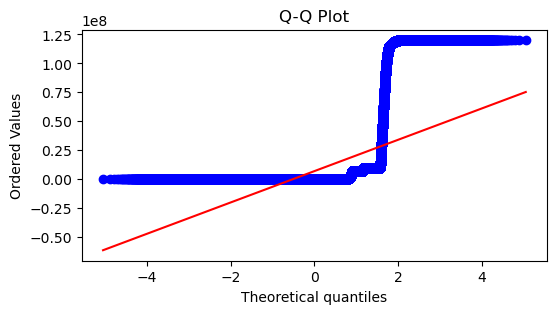

In [42]:
# Q-Q Plot
plt.figure(figsize=(6, 3))
stats.probplot(df['Flow Duration'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

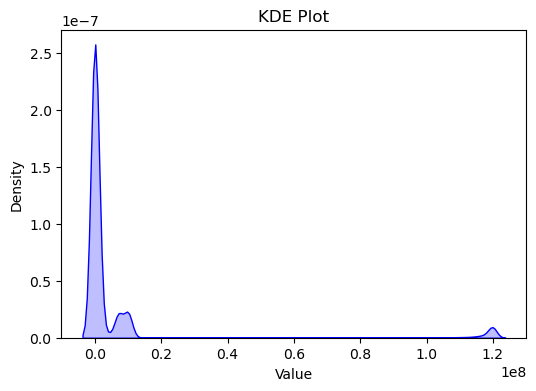

In [39]:
time.time()
# KDE plot
plt.figure(figsize=(6,4))
sns.kdeplot(data['Flow Duration'], fill=True, color="blue")
plt.title('KDE Plot')
plt.xlabel('Value')
# plt.label('Density')
plt.show()

> Overall data should be normalized as values range up to even crores
 
> Check for distribution of each features for further analysis

### **The columns in which there are few instances with extreme values and in which the most instances are close to 0 or 0. Use Log Transformation, etc and then normalization**

In [6]:
data.iloc[:, 15:30].describe() # 15 numerical columns 

,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max
count,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.190424e+06,3.231475e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06
mean,3.330028e+02,1.060918e+03,2.886440e+00,2.271624e+02,3.670041e+02,inf,inf,2.735251e+05,3.360596e+05,1.276584e+06,8.328863e+04,6.945646e+06,3.285592e+05,3.410078e+05,1.256459e+06
std,5.491157e+02,3.728560e+03,2.642945e+01,1.211658e+03,1.357321e+03,NaN,NaN,1.508600e+06,2.094611e+06,6.032778e+06,9.103900e+05,2.452922e+07,1.975864e+06,2.020715e+06,5.977838e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.676950e-02,4.000000e+00,0.000000e+00,4.000000e+00,-3.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.755825e+01,3.570000e+02,0.000000e+00,2.975000e+01,7.900000e+01,1.311855e+04,9.950051e+01,7.968889e+02,1.691476e+03,6.120000e+03,4.000000e+00,7.436000e+03,1.286400e+03,1.905740e+03,5.221000e+03
50%,2.126974e+02,3.570000e+02,0.000000e+00,7.140000e+01,1.596553e+02,2.953897e+04,3.049976e+02,3.698667e+03,9.634148e+03,3.084300e+04,8.000000e+00,3.748100e+04,7.329000e+03,1.270876e+04,2.996400e+04
75%,2.392593e+02,3.570000e+02,0.000000e+00,7.140000e+01,1.596553e+02,1.341632e+05,1.664145e+03,1.121073e+04,2.693886e+04,1.073290e+05,1.100000e+01,1.288720e+05,2.204600e+04,3.565635e+04,1.043795e+05
max,1.247533e+04,6.470400e+04,3.561000e+03,3.493059e+04,3.118938e+04,inf,inf,1.192641e+08,8.399294e+07,1.199621e+08,1.192641e+08,1.200000e+08,1.199622e+08,8.365714e+07,1.199622e+08


> In columns like Flow Bytes/s and Flow Packets/s, the most values are infinity and also the maximum value in these columns.
> Also, there is no standard deviation (NaN) 

> 

In [7]:
data.iloc[:, 30:45].describe() # 15 numerical columns 

,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd RST Flags,Bwd RST Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s
count,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3231475.0,3231475.0,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06
mean,1.179019e+05,6.068053e+06,1.277624e+05,1.533856e+05,7.162992e+05,3.828208e+04,7.533344e+01,7.953056e+01,0.0,0.0,1.665648e-02,7.517310e-03,4.124924e+03,3.392609e+03,2.274623e+03
std,1.475624e+06,2.387446e+07,1.472715e+06,1.031695e+06,3.916720e+06,1.147860e+06,4.183171e+02,5.331010e+02,0.0,0.0,1.581370e-01,1.220052e-01,2.183001e+04,1.876878e+04,5.989855e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,2.382000e+03,4.445000e+02,4.625197e+02,1.258000e+03,1.200000e+01,1.000000e+00,1.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,1.680000e+02,1.680000e+02,4.712465e+01
50%,2.300000e+01,2.706800e+04,6.331750e+03,1.030339e+04,2.231200e+04,2.200000e+01,1.000000e+00,1.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,2.000000e+02,1.680000e+02,1.546671e+02
75%,3.200000e+01,8.073100e+04,1.769325e+04,2.945571e+04,6.433400e+04,3.400000e+01,2.000000e+00,1.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,2.320000e+02,2.000000e+02,7.874016e+02
max,1.199622e+08,1.200000e+08,1.199621e+08,8.366532e+07,1.199621e+08,1.199621e+08,7.831000e+03,1.020000e+04,0.0,0.0,1.000000e+01,2.800000e+01,4.857720e+05,5.749200e+05,3.333333e+05


> the column 'Fwd URG Flags' and 'Bwd URG Flags' has only one unique item over the whole, that is value '0'

> indicate there is no forward urgent flags and no backward urgent flags 

In [8]:
data['Fwd URG Flags'].unique()

array([0], dtype=int64)

In [9]:
data.iloc[:, 45:60].describe() # 15 numerical columns 

,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio
count,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3231475.0,3231475.0,3231475.0,3.231475e+06
mean,1.944105e+03,8.355488e-01,2.165426e+03,2.164166e+02,4.638876e+02,1.596198e+06,1.674717e+00,1.998901e+00,2.425827e-02,1.548640e+02,2.331495e+02,0.0,0.0,0.0,7.773432e-01
std,5.127950e+03,6.574541e+00,4.968920e+03,6.260783e+02,1.175162e+03,2.262454e+07,7.360630e-01,8.149936e-01,2.063659e-01,8.766922e+02,1.262182e+03,0.0,0.0,0.0,2.816420e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00
25%,4.211342e+01,0.000000e+00,5.100000e+02,7.900000e+01,1.712078e+02,2.931210e+04,2.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,9.000000e+00,0.0,0.0,0.0,6.894977e-01
50%,1.342102e+02,0.000000e+00,5.200000e+02,8.209091e+01,1.845085e+02,3.404340e+04,2.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,1.000000e+01,0.0,0.0,0.0,8.333333e-01
75%,6.440809e+02,0.000000e+00,5.450000e+02,1.260000e+02,2.213949e+02,4.901569e+04,2.000000e+00,2.000000e+00,0.000000e+00,3.000000e+00,1.200000e+01,0.0,0.0,0.0,1.000000e+00
max,2.500000e+05,1.348000e+03,6.470400e+04,1.814490e+04,2.751984e+04,7.573413e+08,1.300000e+01,1.600000e+01,3.000000e+01,1.161200e+04,3.258600e+04,0.0,0.0,0.0,3.000000e+01


> This shows that there are no urgent, cwr and ece flags present 

In [10]:
data.iloc[:, 60:75].describe() # 15 numerical columns 

,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes
count,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06
mean,2.164166e+02,1.893546e+02,2.271624e+02,8.967764e+03,9.654493e+00,8.445195e+05,6.100337e+03,1.420971e+00,3.842389e+06,8.419746e-02,1.090405e+02,4.518061e-05,1.064850e+02,6.023249e+04,4.957609e+02
std,6.260783e+02,3.597574e+02,1.211658e+03,4.137666e+04,3.129977e+01,1.737915e+07,9.158971e+04,1.909298e+01,7.077432e+07,2.776838e-01,2.147488e+02,6.721501e-03,5.991156e+02,1.583170e+04,8.530959e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.900000e+01,5.833333e+01,2.975000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.300000e+01,0.000000e+00,1.300000e+01,6.424000e+04,5.020000e+02
50%,8.209091e+01,8.750000e+01,7.140000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,3.200000e+01,6.424000e+04,5.020000e+02
75%,1.260000e+02,1.472857e+02,7.140000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.900000e+01,0.000000e+00,3.500000e+01,6.424000e+04,5.020000e+02
max,1.814490e+04,1.715153e+04,3.493059e+04,1.756019e+06,7.350000e+02,2.534442e+09,1.606308e+07,5.986000e+03,3.519127e+09,1.000000e+00,1.054700e+04,1.000000e+00,1.813700e+04,6.549500e+04,6.470400e+04


In [11]:
# data['Bwd Packet/Bulk Avg'].unique()

In [12]:
data.iloc[:, 75:87].describe() # 12 numerical columns 

,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
count,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06
mean,7.550082e+01,3.164003e+01,2.437296e+05,1.734073e+05,4.792189e+05,1.168187e+05,6.715270e+05,1.259603e+05,8.242769e+05,5.529524e+05,7.186553e+07,1.643862e-01
std,4.182399e+02,5.804100e+00,2.654499e+06,1.768455e+06,4.228964e+06,2.195276e+06,5.274227e+06,1.262020e+06,5.958127e+06,4.972078e+06,1.686803e+09,7.431021e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.991000e+03,0.000000e+00
50%,1.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.671400e+04,0.000000e+00
75%,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.232845e+05,0.000000e+00
max,7.830000e+03,4.000000e+01,1.148279e+08,7.718153e+07,1.148279e+08,1.148279e+08,1.199621e+08,7.711554e+07,1.199621e+08,1.199621e+08,8.638926e+10,1.100000e+01


In [13]:
# Assuming you have a DataFrame named 'data'
object_columns = data.select_dtypes(include='object').columns.tolist()
print(object_columns)

['Flow ID', 'Src IP', 'Dst IP', 'Timestamp']


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231475 entries, 0 to 3231474
Data columns (total 87 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Flow ID                     object 
 1   Src IP                      object 
 2   Src Port                    int64  
 3   Dst IP                      object 
 4   Dst Port                    int64  
 5   Protocol                    int64  
 6   Timestamp                   object 
 7   Flow Duration               int64  
 8   Total Fwd Packet            int64  
 9   Total Bwd packets           int64  
 10  Total Length of Fwd Packet  float64
 11  Total Length of Bwd Packet  float64
 12  Fwd Packet Length Max       float64
 13  Fwd Packet Length Min       float64
 14  Fwd Packet Length Mean      float64
 15  Fwd Packet Length Std       float64
 16  Bwd Packet Length Max       float64
 17  Bwd Packet Length Min       float64
 18  Bwd Packet Length Mean      float64
 19  Bwd Packet Length Std

> 4 Columns are categorical type (object64)  
 
> 64 columns are float type and 38 are integer type 

> Convert either float to int or vice versa (do as required)

In [15]:
# Check null 
def print_null(column):
    if data[column].isnull().sum() > 0:
        print(f'{column} has {data[column].isnull().sum()} null values')

for column in data.columns:
    print_null(column)

Flow Bytes/s has 41051 null values
Flow IAT Mean has 41709 null values
Flow IAT Std has 41709 null values
Flow IAT Max has 41709 null values
Flow IAT Min has 41709 null values


In [16]:
data.Label.value_counts()

Label
0     2953291
2      156614
1      111251
11       8722
8         824
6         193
3         168
4         163
7         131
10         48
5          36
9          34
Name: count, dtype: int64

**Basic Data Cleaning**

In [17]:
# Columns with all values as zero 
zero_columns = ['Fwd URG Flags', 'Bwd URG Flags', 'URG Flag Count', 'CWR Flag Count', 'ECE Flag Count']

data = data.drop(columns=zero_columns)

In [18]:
print(f"Number of columns: {len(data.columns)}")

Number of columns: 82


### Handling Missing Values

In [19]:
# Null Values 
data.isna().sum().sum()

207887

In [20]:
null_value_columns = []
for i in data.columns: 
    if data[i].isna().sum() > 0: 
        print(f"{i} has {data[i].isna().sum()} null values")
        null_value_columns.append(i)

Flow Bytes/s has 41051 null values
Flow IAT Mean has 41709 null values
Flow IAT Std has 41709 null values
Flow IAT Max has 41709 null values
Flow IAT Min has 41709 null values


In [21]:
# We will drop the rows with null columns 
for i in null_value_columns: 
    data = data.dropna(subset=[i])

In [22]:
# Check instances after null values drop
print("Data shape before dropping null: 3231475")
print(f"Data shape after dropping null: {data.shape[0]}")

Data shape before dropping null: 3231475
Data shape after dropping null: 3189766


In [23]:
# Check if null values are present 
data.isna().sum().sum() 

0

# **EDA** 

### **Descriptive Statistics**

Distribution Analysis

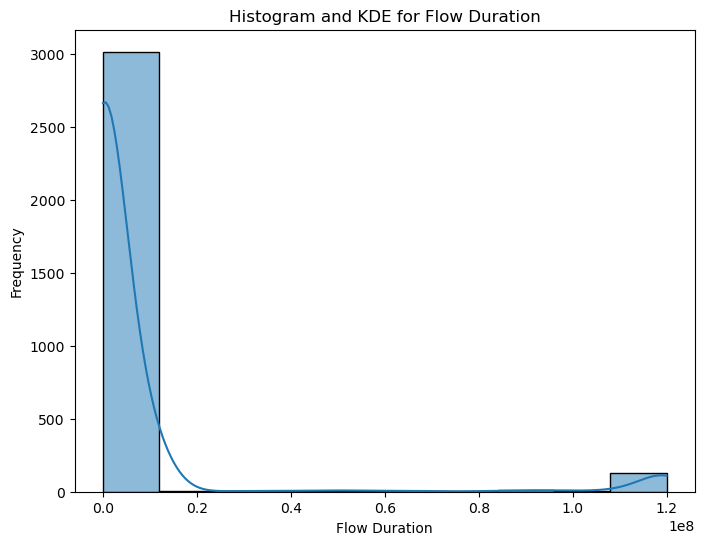

In [24]:
# Down sample the data 
df = data 
sample_frac = 0.001 # Take 0.1% of data 
df_sampled = df.sample(frac=sample_frac, random_state=1)

# Plot 
plt.figure(figsize=(8,6))
sns.histplot(df_sampled['Flow Duration'], kde = True, bins = 10)
plt.title('Histogram and KDE for Flow Duration')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.show()

In [25]:
len(df['Flow Duration'].unique())

616642

In [26]:
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd RST Flags', 'Bwd RST Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [27]:
len(df['Fwd IAT Std'].unique())

2976829

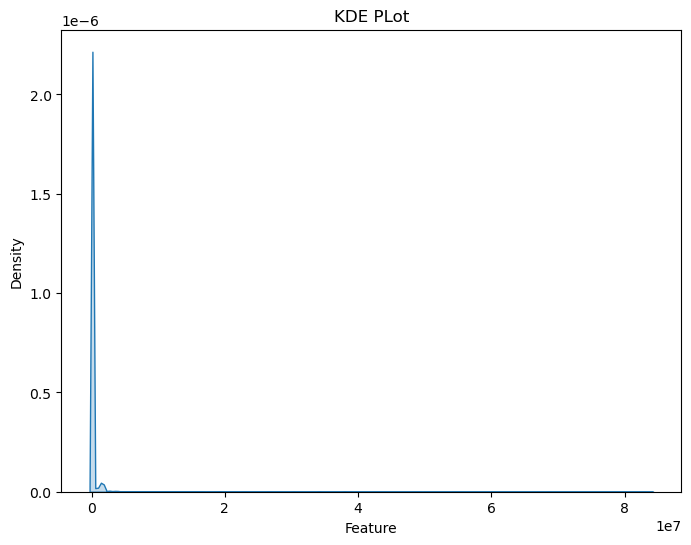

In [28]:
# Plot box plots for each column in the DataFrame
# for column in df.columns:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Flow IAT Std'], fill=True)
plt.title(f'KDE PLot')
plt.xlabel('Feature')
plt.ylabel('Density')
plt.show()